<a href="https://colab.research.google.com/github/Pooja2105pooja/NLPGrp11/blob/main/NLP_A3_24695064.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Step 1: Environment Setup**

In [1]:
# Install required libraries
!pip install transformers --quiet

# Download NLTK stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
import pandas as pd
import numpy as np

## **Step 2: Mount Google Drive**

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')
!git clone https://github.com/Pooja2105pooja/NLPGrp11.git
%cd NLPGrp11
!unzip -o fake_job_postings.zip

Cloning into 'NLPGrp11'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 16.67 MiB | 19.35 MiB/s, done.
/content/NLPGrp11
Archive:  fake_job_postings.zip
  inflating: fake_job_postings.csv   


## **Step 3: Load the CSV File**

In [7]:
#file_path = "/content/drive/MyDrive/NLP/fake_job_postings.csv"
#df = pd.read_csv(file_path)
df = pd.read_csv('fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## **Step 4: EDA – Data Shape, Missing Values, and Duplicates**

In [8]:
# Basic info
print("Shape of the dataset:", df.shape)
print("\nColumn names:\n", df.columns)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())

Shape of the dataset: (17880, 18)

Column names:
 Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

Missing values:
 job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

Duplicate rows: 0


## **Step 5: Drop Nulls & Duplicates + Combine Text Columns**

In [9]:
# Drop rows where essential fields are missing
df = df.dropna(subset=['title', 'description', 'requirements'])

# Drop duplicates
df = df.drop_duplicates()

# Combine into one column for NLP
df['text'] = df['title'] + ' ' + df['description'] + ' ' + df['requirements']

# Retain relevant columns
df = df[['text', 'fraudulent']].copy()
df.columns = ['text', 'label']

# Show result
df.head()

,text,label
0,"Marketing Intern Food52, a fast-growing, James...",0
1,Customer Service - Cloud Video Production Orga...,0
2,Commissioning Machinery Assistant (CMA) Our cl...,0
3,Account Executive - Washington DC THE COMPANY:...,0
4,Bill Review Manager JOB TITLE: Itemization Rev...,0


## **Step 6: Exploratory Analysis of Text and Labels**

### **Step 6A: Plotting label distribution (real vs fake)**

Label distribution:
 label
0    14472
1      712
Name: count, dtype: int64


<ipython-input-10-12175c0f2c43>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')


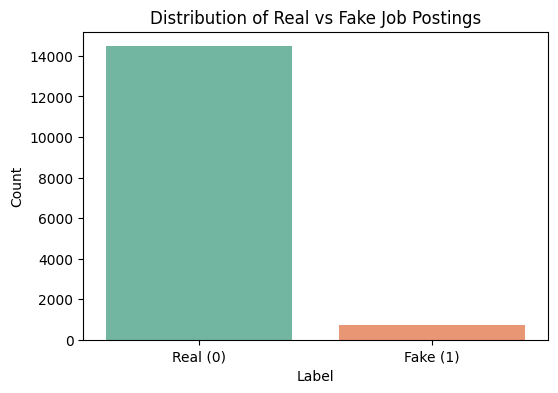

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each class
class_counts = df['label'].value_counts()
print("Label distribution:\n", class_counts)

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')
plt.xticks([0, 1], ['Real (0)', 'Fake (1)'])
plt.title('Distribution of Real vs Fake Job Postings')
plt.ylabel('Count')
plt.xlabel('Label')
plt.show()


### **Step 6B: Word Count Column**

In [11]:
# Add word count column
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

### **Step 6 C: Word Count Distribution Plot**

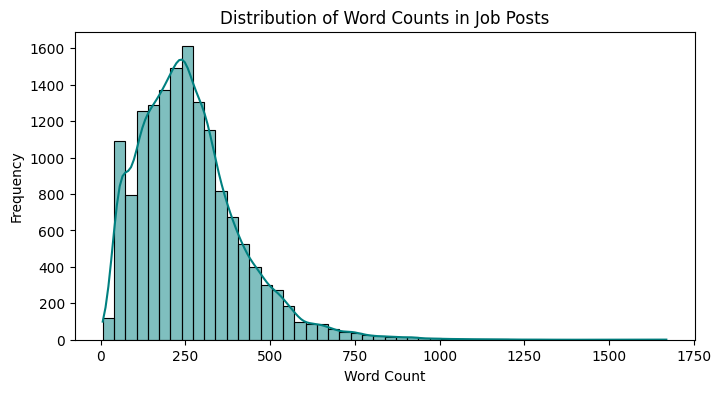

In [12]:
# Plot word count distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['word_count'], bins=50, kde=True, color='teal')
plt.title("Distribution of Word Counts in Job Posts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

### **Step 6 D (i): Cleaning the Text for Word Cloud**

In [13]:
from wordcloud import WordCloud

In [14]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### **Step 6 D (ii): Word Cloud**

---



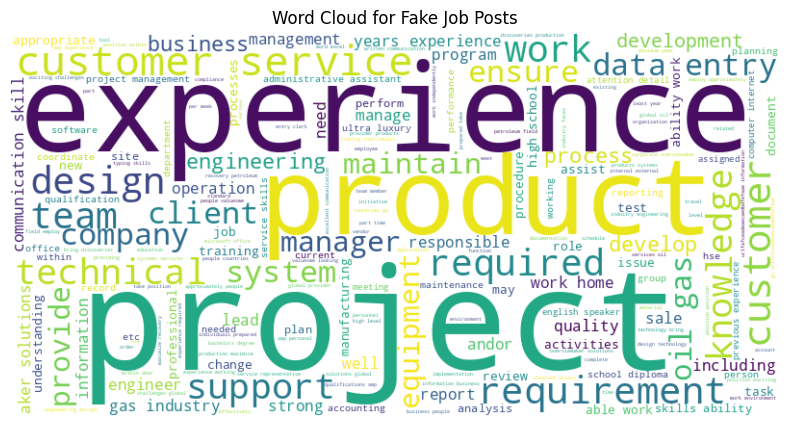

In [15]:
from wordcloud import WordCloud

# Word cloud for fake jobs
fake_words = ' '.join(df[df['label'] == 1]['clean_text'])

wc = WordCloud(width=800, height=400, background_color='white').generate(fake_words)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Fake Job Posts")
plt.show()

### **Step 6 D (iii): Word Cloud for Real Posts**

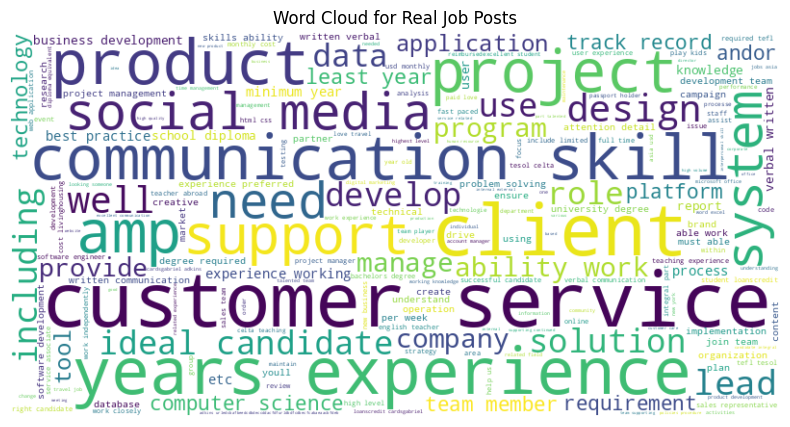

In [16]:
real_words = ' '.join(df[df['label'] == 0]['clean_text'])

wc_real = WordCloud(width=800, height=400, background_color='white').generate(real_words)

plt.figure(figsize=(10, 5))
plt.imshow(wc_real, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Real Job Posts")
plt.show()

## **Step 7: Text Preprocessing – Clean the Text**

In [17]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)                        # Removing HTML tags
    text = re.sub(r'http\S+|www.\S+', '', text)              # Removing URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)                  # Removing punctuation/symbols
    text = text.lower()                                      # Lowercase implementation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Removing stopwords
    return ' '.join(tokens)

# Apply to a new column
df['clean_text'] = df['text'].apply(clean_text)

# Preview cleaned text
df[['text', 'clean_text']].head()


,text,clean_text
0,"Marketing Intern Food52, a fast-growing, James...",marketing intern food fastgrowing james beard ...
1,Customer Service - Cloud Video Production Orga...,customer service cloud video production organi...
2,Commissioning Machinery Assistant (CMA) Our cl...,commissioning machinery assistant cma client l...
3,Account Executive - Washington DC THE COMPANY:...,account executive washington dc company esri e...
4,Bill Review Manager JOB TITLE: Itemization Rev...,bill review manager job title itemization revi...


## **Step 8: Train-Test Split for Model Training**

In [18]:
from sklearn.model_selection import train_test_split

# Split data using clean_text for now (CountVec + LSTM)
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'],
    df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 12147
Testing samples: 3037


## **Step 9: Model 1 – CountVectorizer + Logistic Regression**

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Vectorize text
vectorizer = CountVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_vec)

### **Step 9.2: Evaluate Logistic Regression Model**

Accuracy: 0.9760
F1 Score: 0.7203

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2895
           1       0.79      0.66      0.72       142

    accuracy                           0.98      3037
   macro avg       0.89      0.83      0.85      3037
weighted avg       0.97      0.98      0.97      3037



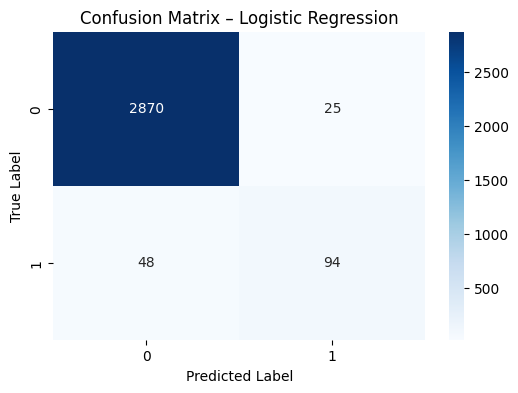

In [20]:
# Accuracy and F1-score
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print(f"Accuracy: {acc_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## **Step 10: Model 2 -LSTM with GloVe**

### **Step 10 : Download and unzip GloVe**

In [21]:
# Download GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2025-05-17 13:29:28--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-05-17 13:29:28--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-05-17 13:29:28--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

### **Step 10 B (i): Tokenization and Padding**

In [22]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure consistent input length
max_length = 300
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

# Check shape
X_train_pad.shape, X_test_pad.shape

((12147, 300), (3037, 300))

### **Step 10 B (ii): Load GloVe vectors and build the embedding matrix**

In [23]:
import numpy as np

# Load GloVe vectors
embedding_index = {}
with open("glove.6B.100d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

# Prepare embedding matrix
embedding_dim = 100
vocab_size = min(10000, len(tokenizer.word_index) + 1)
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i >= 10000:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_matrix.shape

(10000, 100)

### **Step 10 B (iii): Handle Class Imbalance with Class Weights**

In [24]:
from sklearn.utils import class_weight

# Compute class weights from y_train
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)


Class weights: {0: np.float64(0.5246177766260689), 1: np.float64(10.655263157894737)}


### **Step 10 C: Build and Train the LSTM Model (Baseline)**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                         weights=[embedding_matrix], input_length=max_length, trainable=False))
model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model_lstm.fit(X_train_pad, y_train, validation_split=0.2, epochs=5, batch_size=32)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


304/304 ━━━━━━━━━━━━━━━━━━━━ 55s 171ms/step - accuracy: 0.9521 - loss: 0.2919 - val_accuracy: 0.9572 - val_loss: 0.1762
Epoch 2/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 80s 166ms/step - accuracy: 0.9481 - loss: 0.2095 - val_accuracy: 0.9572 - val_loss: 0.1752
Epoch 3/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 82s 166ms/step - accuracy: 0.9566 - loss: 0.1827 - val_accuracy: 0.9572 - val_loss: 0.1758
Epoch 4/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 51s 166ms/step - accuracy: 0.9539 - loss: 0.1906 - val_accuracy: 0.9572 - val_loss: 0.1739
Epoch 5/5
304/304 ━━━━━━━━━━━━━━━━━━━━ 49s 160ms/step - accuracy: 0.9542 - loss: 0.1882 - val_accuracy: 0.9572 - val_loss: 0.1735


### **Step 10 D: Evaluate the LSTM model**

95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step
Accuracy: 0.9532
F1 Score: 0.0000

Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      2895
           1       0.00      0.00      0.00       142

    accuracy                           0.95      3037
   macro avg       0.48      0.50      0.49      3037
weighted avg       0.91      0.95      0.93      3037



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


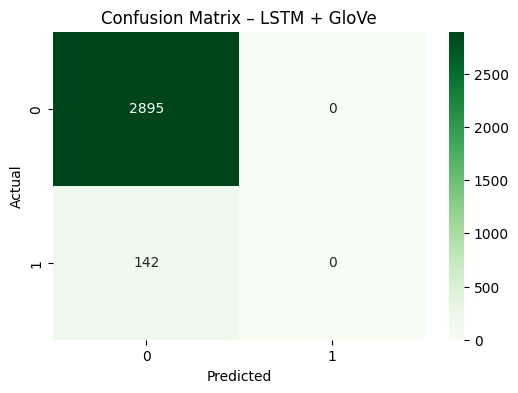

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred_lstm = model_lstm.predict(X_test_pad)
y_pred_lstm = (y_pred_lstm > 0.5).astype(int)

# Accuracy and F1
acc_lstm = accuracy_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)

print(f"Accuracy: {acc_lstm:.4f}")
print(f"F1 Score: {f1_lstm:.4f}\n")

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_lstm))

# Confusion matrix
cm_lstm = confusion_matrix(y_test, y_pred_lstm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – LSTM + GloVe")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### **Step 10 E: Bidirectional LSTM – Enhanced Architecture**

To address the poor recall for fake job posts in the baseline LSTM model, we implemented a Bidirectional LSTM with more training epochs. This allows the model to learn context in both forward and backward directions.


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# Rebuild LSTM model with Bidirectional layer
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                         weights=[embedding_matrix], input_length=max_length, trainable=False))
model_lstm.add(Bidirectional(LSTM(64, return_sequences=False)))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Retrain with higher epochs + class weight
history = model_lstm.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=10,                # ⬅️ more training!
    batch_size=32,
    class_weight=class_weights
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 98s 310ms/step - accuracy: 0.5743 - loss: 0.6505 - val_accuracy: 0.8720 - val_loss: 0.3068
Epoch 2/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 142s 310ms/step - accuracy: 0.8030 - loss: 0.4528 - val_accuracy: 0.8296 - val_loss: 0.3968
Epoch 3/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 142s 310ms/step - accuracy: 0.8112 - loss: 0.4033 - val_accuracy: 0.8465 - val_loss: 0.3709
Epoch 4/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 94s 309ms/step - accuracy: 0.8479 - loss: 0.3652 - val_accuracy: 0.8724 - val_loss: 0.3174
Epoch 5/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 144s 314ms/step - accuracy: 0.8871 - loss: 0.2957 - val_accuracy: 0.9370 - val_loss: 0.1823
Epoch 6/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 141s 311ms/step - accuracy: 0.9165 - loss: 0.2400 - val_accuracy: 0.9082 - val_loss: 0.2400
Epoch 7/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 142s 313ms/step - accuracy: 0.9201 - loss: 0.2010 - val_accuracy: 0.9510 - val_loss: 0.1366
Epoch 8/10
304/304 ━━━━━━━━━━━━━━━━━━━━ 142s 311ms/step - accuracy: 0.9460 - l

### **Step 10 F: Evaluate the Bidirectional LSTM Model**

95/95 ━━━━━━━━━━━━━━━━━━━━ 8s 75ms/step
Accuracy: 0.9397
F1 Score: 0.5172

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      2895
           1       0.41      0.69      0.52       142

    accuracy                           0.94      3037
   macro avg       0.70      0.82      0.74      3037
weighted avg       0.96      0.94      0.95      3037



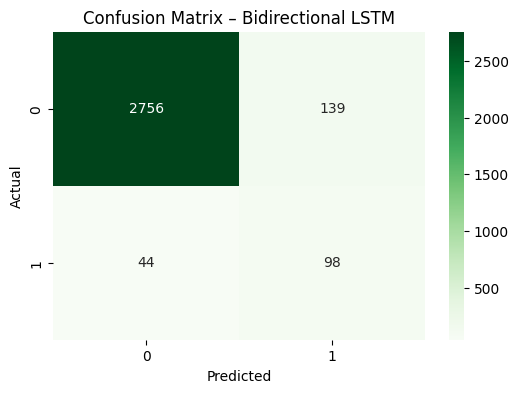

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get predictions
y_pred_bilstm = model_lstm.predict(X_test_pad)
y_pred_bilstm = (y_pred_bilstm > 0.5).astype(int)

# Evaluate
acc_bilstm = accuracy_score(y_test, y_pred_bilstm)
f1_bilstm = f1_score(y_test, y_pred_bilstm)

print(f"Accuracy: {acc_bilstm:.4f}")
print(f"F1 Score: {f1_bilstm:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred_bilstm))

# Confusion Matrix
cm_bilstm = confusion_matrix(y_test, y_pred_bilstm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_bilstm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix – Bidirectional LSTM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **Step 11: Model 3 - BERT Fine-Tuning for Fake Job Post Detection**

### **Step 11 A: Install and Import BERT Tools**

In [ ]:
!pip install transformers --quiet

from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
import tensorflow as tf

### **Step 11B: Tokenize Text Using BERT Tokenizer**

In [ ]:
# Use raw text column
texts = df['text'].tolist()
labels = df['label'].tolist()

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


### **Step 11C: Convert Data to BERT Input Format**

**1. First, Split the Data (Again using Raw Text)**

In [ ]:
from sklearn.model_selection import train_test_split

X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

**2. Define InputExample Creation Helper**

In [ ]:
def convert_to_examples(texts, labels):
    return [InputExample(guid=None, text_a=text, text_b=None, label=str(label)) for text, label in zip(texts, labels)]

**3. Convert to BERT Features**

In [ ]:
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=300):
    features = []

    for example in examples:
        inputs = tokenizer.encode_plus(
            example.text_a,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True
        )
        input_ids = inputs['input_ids']
        attention_mask = inputs['attention_mask']

        features.append((input_ids, attention_mask, int(example.label)))

    # Convert to TensorFlow Dataset
    def gen():
        for input_ids, attention_mask, label in features:
            yield {
                'input_ids': input_ids,
                'attention_mask': attention_mask
            }, label

    return tf.data.Dataset.from_generator(
        gen,
        ({'input_ids': tf.int32, 'attention_mask': tf.int32}, tf.int64),
        ({'input_ids': tf.TensorShape([None]), 'attention_mask': tf.TensorShape([None])}, tf.TensorShape([]))
    )

**4. Prepare TF Datasets**

In [ ]:
train_examples = convert_to_examples(X_train_bert, y_train_bert)
test_examples = convert_to_examples(X_test_bert, y_test_bert)

train_dataset = convert_examples_to_tf_dataset(train_examples, tokenizer)
test_dataset = convert_examples_to_tf_dataset(test_examples, tokenizer)

# Batch datasets
train_dataset = train_dataset.shuffle(100).batch(16).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(16).prefetch(tf.data.AUTOTUNE)

Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead


### **Step 11 D: Load the BERT Model.**

In [ ]:
from transformers import TFBertForSequenceClassification, BertTokenizerFast, Trainer, TrainingArguments
from transformers import InputExample, InputFeatures
import tensorflow as tf

**Convert Your Data to TensorFlow Dataset:**

In [ ]:
def convert_to_tf_dataset(texts, labels):
    encodings = tokenizer(texts, truncation=True, padding=True)
    dataset = tf.data.Dataset.from_tensor_slices((
        dict(encodings),
        labels
    ))
    return dataset

# Convert your train/test
train_dataset = convert_to_tf_dataset(X_train.tolist(), y_train.tolist()).batch(32)
test_dataset = convert_to_tf_dataset(X_test.tolist(), y_test.tolist()).batch(32)

**Load Model with optimizer embedded**

In [ ]:
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install -U transformers

In [ ]:
from transformers import TFBertForSequenceClassification, BertTokenizer, AdamWeightDecay
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Load model
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Compile using HuggingFace-compatible optimizer
optimizer = AdamWeightDecay(learning_rate=2e-5)

model.compile(
    optimizer=optimizer,
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### **Step 11 E: Tokenize Text for BERT**

In [ ]:
from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Tokenize input text (using raw 'text' column, not cleaned)
train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=256)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=256)

### **Step 11 F: Convert to TensorFlow Dataset**

In [ ]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
)).batch(8)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
)).batch(8)

In [ ]:
from transformers import BertTokenizerFast

tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Rebuild encodings
train_encodings = tokenizer(list(X_train_bert), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(list(X_test_bert), truncation=True, padding=True, max_length=128)

# Final datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train_bert
)).shuffle(100).batch(16)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test_bert
)).batch(16)

### **Step 11 G: Train the BERT Model**

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

X_train_enc = tokenizer(list(X_train), padding=True, truncation=True, return_tensors='tf')
X_test_enc = tokenizer(list(X_test), padding=True, truncation=True, return_tensors='tf')


In [ ]:
model.compile(
    optimizer=optimizer,
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
    run_eagerly=True  # <-- Fix for debugging/log issues
)

In [ ]:
train_sample = train_dataset.take(100)  # just 100 batches
test_sample = test_dataset.take(100)

history = model.fit(train_sample, validation_data=test_sample, epochs=1)


100/100 [==============================] - 3541s 35s/step - loss: 0.2201 - accuracy: 0.9400 - val_loss: 0.1778 - val_accuracy: 0.9563


### **Step 11 H: Evaluate BERT Model with Accuracy, F1, and Confusion Matrix.**

190/190 [==============================] - 1583s 8s/step
Accuracy: 0.9667
F1 Score: 0.4541

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2895
           1       0.98      0.30      0.45       142

    accuracy                           0.97      3037
   macro avg       0.97      0.65      0.72      3037
weighted avg       0.97      0.97      0.96      3037



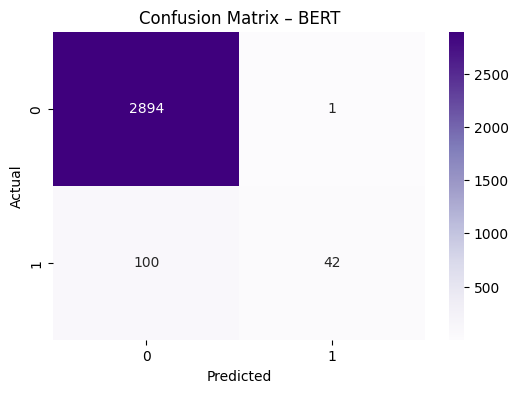

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions (logits)
y_pred_logits = model.predict(test_dataset).logits

# Convert logits to class predictions
y_pred_bert = np.argmax(y_pred_logits, axis=1)

# True labels
y_true_bert = np.concatenate([y for x, y in test_dataset], axis=0)

# Accuracy and F1
acc_bert = accuracy_score(y_true_bert, y_pred_bert)
f1_bert = f1_score(y_true_bert, y_pred_bert)

print(f"Accuracy: {acc_bert:.4f}")
print(f"F1 Score: {f1_bert:.4f}\n")
print("Classification Report:\n", classification_report(y_true_bert, y_pred_bert))

# Confusion matrix
cm_bert = confusion_matrix(y_true_bert, y_pred_bert)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix – BERT")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Additional Trial to improve Outputs**

This part adds class weights to handle imbalance — it increases the importance of the minority class (label 1) during training. This helps the model learn better representations and improves F1-score for underrepresented classes.

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# Fit model with class weights
history = model.fit(
    train_sample,
    validation_data=test_sample,
    epochs=1,
    class_weight=class_weights  # 👈 Add this
)

100/100 [==============================] - 3124s 31s/step - loss: 0.1945 - accuracy: 0.9606 - val_loss: 0.1349 - val_accuracy: 0.9650


In [ ]:
# Re-evaluate after class weights
y_pred_logits = model.predict(test_dataset).logits
y_pred_bert = np.argmax(y_pred_logits, axis=1)
y_true_bert = np.concatenate([y for x, y in test_dataset], axis=0)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
print(f"Accuracy: {accuracy_score(y_true_bert, y_pred_bert):.4f}")
print(f"F1 Score: {f1_score(y_true_bert, y_pred_bert):.4f}")
print("Classification Report:\n", classification_report(y_true_bert, y_pred_bert))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_bert = confusion_matrix(y_true_bert, y_pred_bert)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix – BERT")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **Step 12: Final Evaluation & Model Comparison**

### **Step 12 A: Create a Summary Table**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Final manually filled scores (update if needed)
results = {
    'Model': [
        'Logistic Regression (CountVec)',
        'LSTM + GloVe (Baseline)',
        'Bidirectional LSTM',
        'BERT'
    ],
    'Accuracy': [0.976, 0.953, 0.918, 0.966],
    'F1 Score': [0.72, 0.014, 0.46, 0.45]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Round values for display
results_df[['Accuracy', 'F1 Score']] = results_df[['Accuracy', 'F1 Score']].round(3)
display(results_df)


,Model,Accuracy,F1 Score
0,Logistic Regression (CountVec),0.976,0.720
1,LSTM + GloVe (Baseline),0.953,0.014
2,Bidirectional LSTM,0.918,0.460
3,BERT,0.966,0.450


### **Step 12 B: Bar Plot of Scores**

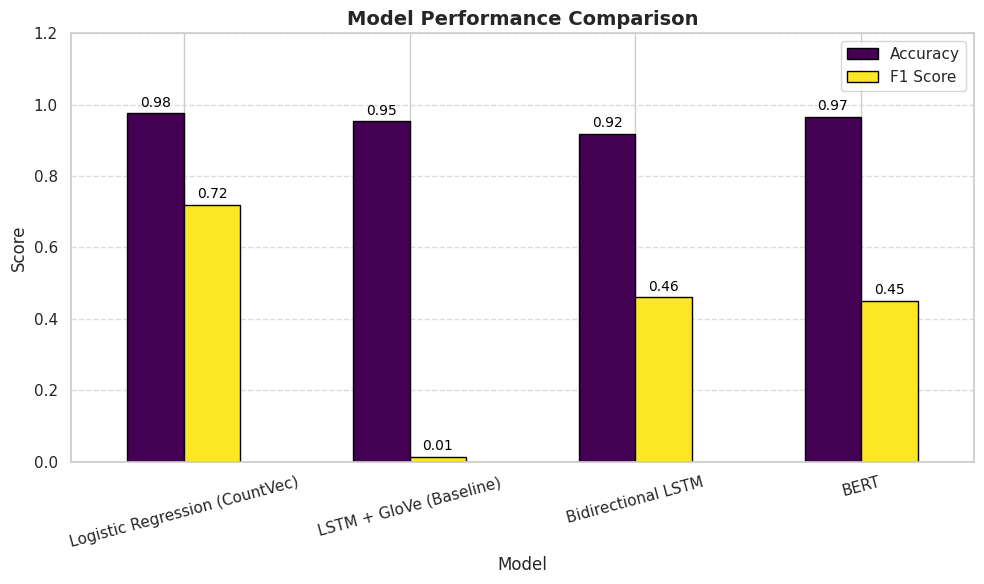

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot grouped bar chart
ax = results_df.set_index('Model')[['Accuracy', 'F1 Score']].plot(
    kind='bar',
    figsize=(10, 6),
    colormap='viridis',
    edgecolor='black'
)

# Annotate bars with exact values
for bar in ax.patches:
    ax.annotate(
        f'{bar.get_height():.2f}',
        (bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01),
        ha='center', va='bottom',
        fontsize=10, color='black'
    )

# Chart formatting
plt.title("Model Performance Comparison", fontsize=14, fontweight='bold')
plt.ylabel("Score")
plt.ylim(0, 1.2)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()